<a href="https://colab.research.google.com/github/Goldenseek/CSE416A-Final-Project/blob/master/US_Aviation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
flights=pd.read_csv("./drive//My Drive/flights-and-airports-data/flights.csv")
airports=pd.read_csv("./drive//My Drive/flights-and-airports-data/airports.csv")

In [0]:
cleanFlights=flights[["Carrier",'OriginAirportID','DestAirportID']]
carriers=list(set(flights['Carrier']))

In [0]:
networks=[]
for carrier in carriers:
  temp=cleanFlights.loc[cleanFlights['Carrier'] == carrier]
  tempG=nx.from_pandas_edgelist(temp,'OriginAirportID','DestAirportID')
  tempG = tempG.subgraph(max(nx.connected_components(tempG), key=len))
  networks.append(tempG)
wholeGraph=nx.from_pandas_edgelist(cleanFlights,'OriginAirportID','DestAirportID','Carrier')

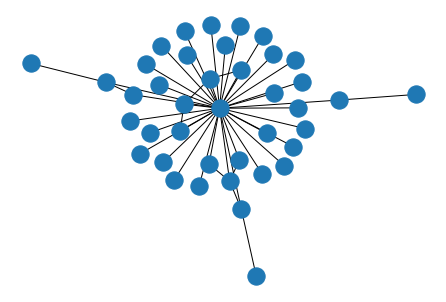

In [0]:
nx.draw(networks[7])

In [0]:
 carriers

['B6',
 'VX',
 'AS',
 'YV',
 'UA',
 'US',
 '9E',
 'F9',
 'AA',
 'HA',
 'DL',
 'FL',
 'WN',
 'OO',
 'MQ',
 'EV']

In [0]:
for g in range(len(networks)):
  st=carriers[g]+'.gexf'
  nx.write_gexf(networks[g],st)

In [0]:
data=pd.DataFrame()

In [0]:
temp=[]
for i in range(len(carriers)):
  try:
    temp.append(nx.diameter(networks[i]))
  except:
    temp.append(0)
data['Diameter']=temp
data

,Diameter
0,4
1,3
2,3
3,4
4,3
5,3
6,4
7,4
8,2
9,2


In [0]:
temp=[]
for i in range(len(carriers)):
  try:
    temp.append(nx.average_clustering(networks[i]))
  except:
    temp.append(0)
data['Avg Clustering']=temp
data


,Diameter,Avg Clustering
0,4,0.596840
1,3,0.644129
2,3,0.260833
3,4,0.460875
4,3,0.834126
5,3,0.620807
6,4,0.587964
7,4,0.187778
8,2,0.667065
9,2,0.343124


In [0]:
temp=[]
for i in range(len(carriers)):
  try:
    temp.append(nx.average_shortest_path_length(networks[i]))
  except:
    temp.append(0)
data['Avg Shortest Path']=temp
data


,Diameter,Avg Clustering,Avg Shortest Path
0,4,0.596840,2.018826
1,3,0.644129,1.842105
2,3,0.260833,1.912656
3,4,0.460875,2.300483
4,3,0.834126,1.893045
5,3,0.620807,2.038914
6,4,0.587964,2.026361
7,4,0.187778,2.080769
8,2,0.667065,1.916940
9,2,0.343124,1.794872


In [0]:
# modularities=[0.160,0.162,0.094,0.142,0.175,0.286,0.116,0.170,0.186,0.196,0.304,0.288,0.098,0.170,0.280]
# data['Modularity']=modularities

In [0]:
data

,Diameter,Avg Clustering,Avg Shortest Path
0,4,0.596840,2.018826
1,3,0.644129,1.842105
2,3,0.260833,1.912656
3,4,0.460875,2.300483
4,3,0.834126,1.893045
5,3,0.620807,2.038914
6,4,0.587964,2.026361
7,4,0.187778,2.080769
8,2,0.667065,1.916940
9,2,0.343124,1.794872


In [0]:
for i in range(len(carriers)):
  d = nx.diameter(networks[i])
  c = nx.average_clustering(networks[i])
  l = nx.average_shortest_path_length(networks[i])
  print(str(carriers[i]) + ":", "D = " + str(d) + ",", "c = " + str(round(c,3)) + ",", "l = " + str(round(l,3)))

B6: D = 4, c = 0.597, l = 2.019
VX: D = 3, c = 0.644, l = 1.842
AS: D = 3, c = 0.261, l = 1.913
YV: D = 4, c = 0.461, l = 2.3
UA: D = 3, c = 0.834, l = 1.893
US: D = 3, c = 0.621, l = 2.039
9E: D = 4, c = 0.588, l = 2.026
F9: D = 4, c = 0.188, l = 2.081
AA: D = 2, c = 0.667, l = 1.917
HA: D = 2, c = 0.343, l = 1.795
DL: D = 3, c = 0.719, l = 1.942
FL: D = 3, c = 0.552, l = 1.878
WN: D = 3, c = 0.695, l = 1.766
OO: D = 4, c = 0.57, l = 2.108
MQ: D = 6, c = 0.027, l = 2.429
EV: D = 3, c = 0.711, l = 1.831


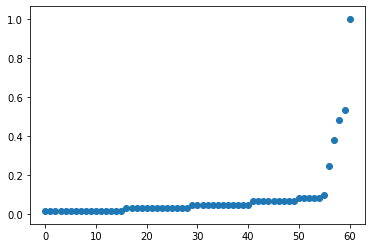

In [0]:
t=sorted(nx.degree_centrality(networks[8]).values())
plt.scatter(range(0,len(t)),t)

<Figure size 432x288 with 0 Axes>

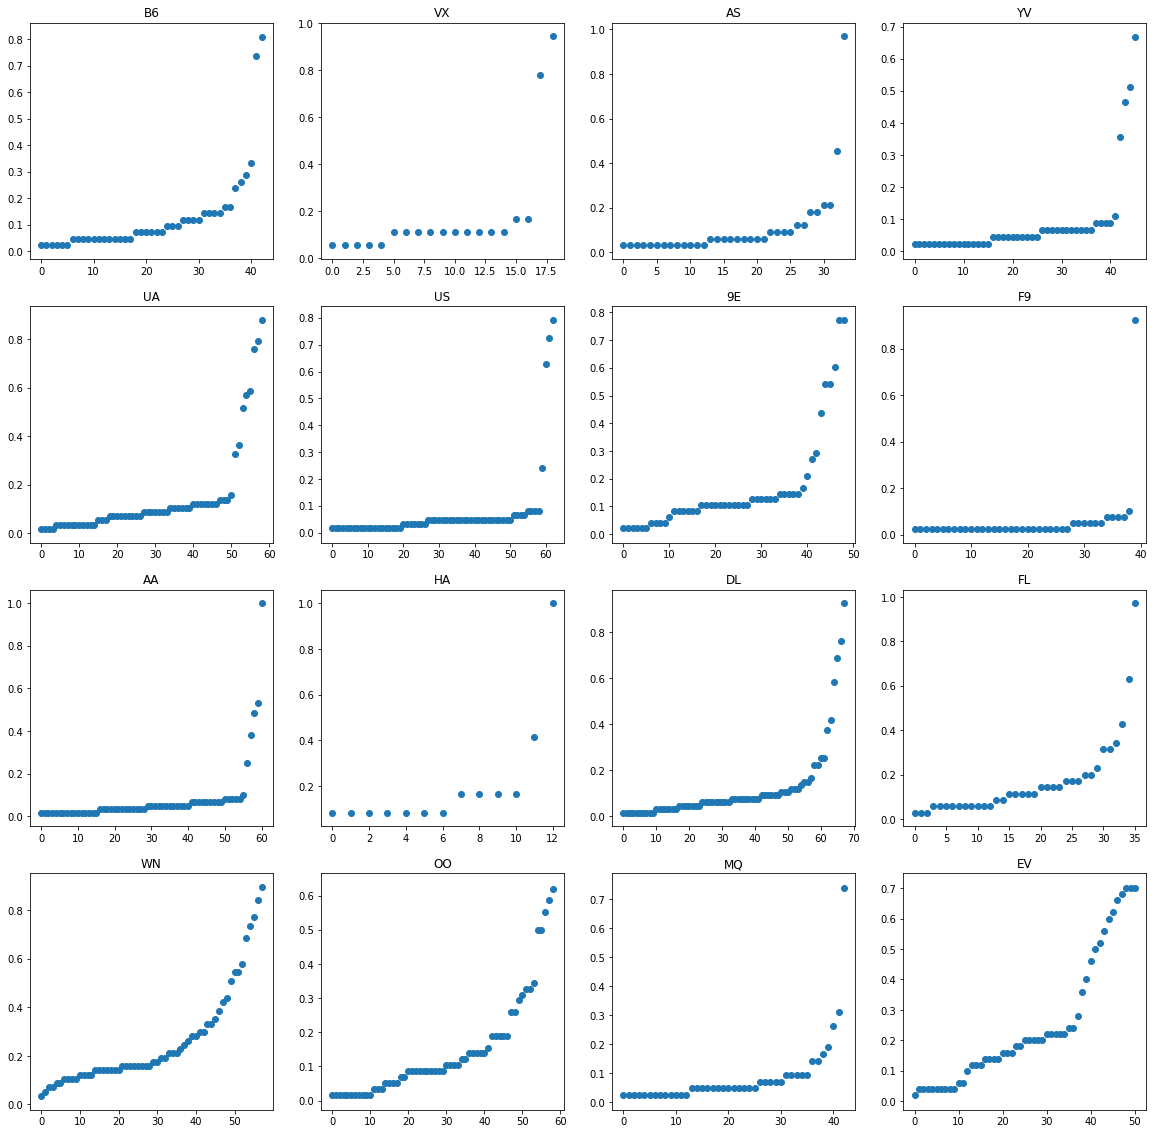

In [0]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig = plt.figure(figsize=(20, 20))
for i in range(0,len(networks)):
    ax = fig.add_subplot(4, 4, i+1)
    t=sorted(nx.degree_centrality(networks[i]).values())
    plt.scatter(range(0,len(t)),t)
    plt.title(carriers[i])

Text(0.5, 1.0, 'All Airlines')

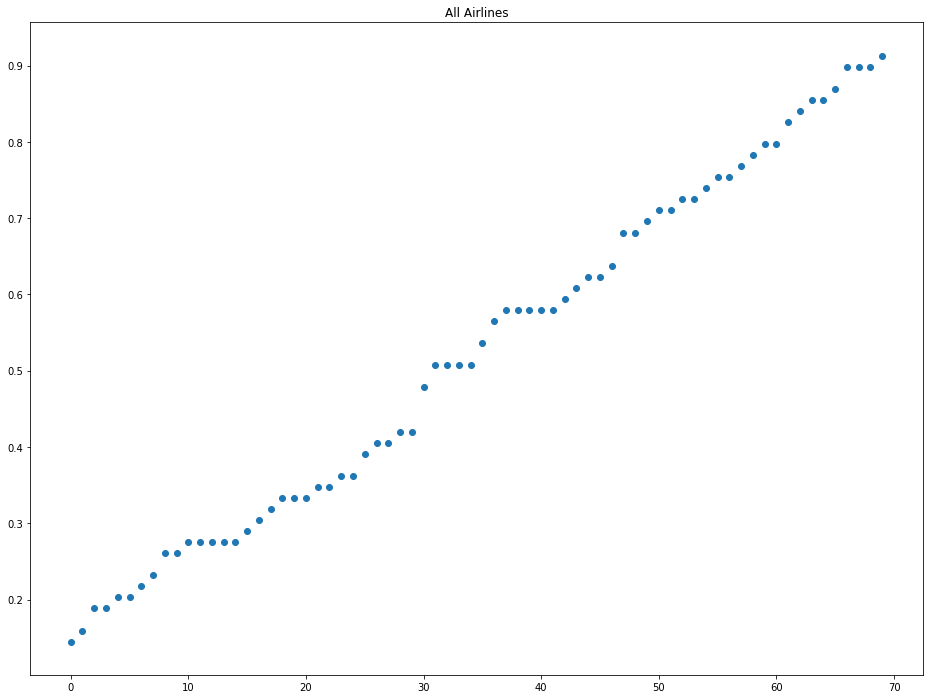

In [0]:
fig = plt.figure(figsize=(16, 12))
t=sorted(nx.degree_centrality(wholeGraph).values())
plt.scatter(range(0,len(t)),t)
plt.title("All Airlines")

In [0]:
import operator
x=(nx.betweenness_centrality(wholeGraph))
t=sorted(x.items(), key=operator.itemgetter(1))

In [0]:
ranking=[]
for i in t:
  ranking.append(list(airports.loc[airports['airport_id']==i[0]]['name']))

In [0]:
importantAirport={}
pt=[]
for i in range(len(networks)):
  x=(nx.betweenness_centrality(networks[i]))
  t=sorted(x.items(), key=operator.itemgetter(1))[-1]
  importantAirport[carriers[i]]=(list(airports.loc[airports['airport_id']==t[0]]['name']),t[1])
  pt.append(t[1])


$D=3$

In [0]:
importantAirport

{'9E': (['Minneapolis-St Paul International'], 0.22958926838476118),
 'AA': (['Dallas/Fort Worth International'], 0.7223352165725048),
 'AS': (['Seattle/Tacoma International'], 0.8268623737373737),
 'B6': (['Logan International'], 0.4574739309627963),
 'DL': (['Hartsfield-Jackson Atlanta International'], 0.4002194931808228),
 'EV': (['George Bush Intercontinental/Houston'], 0.18143004527117118),
 'F9': (['Denver International'], 0.9790823211875843),
 'FL': (['Hartsfield-Jackson Atlanta International'], 0.6057218038730644),
 'HA': (['Honolulu International'], 0.8939393939393939),
 'MQ': (["Chicago O'Hare International"], 0.7435429869987417),
 'OO': (['Denver International'], 0.20229142438187195),
 'UA': (["Chicago O'Hare International"], 0.32401837928153715),
 'US': (['Phoenix Sky Harbor International'], 0.46104353957341776),
 'VX': (['San Francisco International'], 0.6176470588235294),
 'WN': (['Chicago Midway International'], 0.17001217190063964),
 'YV': (['Charlotte Douglas Internati

In [0]:
import community as cm
dendrogram=cm.generate_dendrogram(wholeGraph)
for level in range(len(dendrogram) - 1) :
  print(cm.partition_at_level(dendrogram, level))  # NOQA

In [0]:
for i in range(len(networks)):
  print()
  print(carriers[i],len(networks[i].nodes()))



B6 43

VX 19

AS 34

YV 46

UA 59

US 63

9E 49

F9 40

AA 61

HA 13

DL 68

FL 36

WN 58

OO 59

MQ 43

EV 51


In [0]:
for i in range(len(networks)):
  print()
  print(carriers[i],len(networks[i].edges()))


B6 115

VX 31

AS 62

YV 90

UA 251

US 145

9E 194

F9 46

AA 152

HA 16

DL 281

FL 107

WN 433

OO 256

MQ 78

EV 317


Text(0.5, 0, 'Degree')

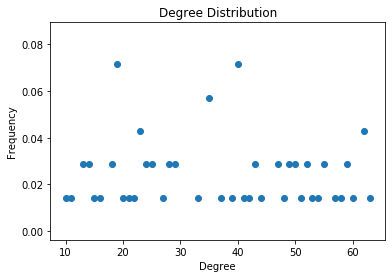

In [0]:
import collections
degree_sequence = sorted([d for n, d in wholeGraph.degree()]) # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cnt = [f/sum(cnt) for f in cnt]

fig, ax = plt.subplots()
plt.scatter(deg,cnt)

plt.title("Degree Distribution")
plt.ylabel("Frequency")
plt.xlabel("Degree")

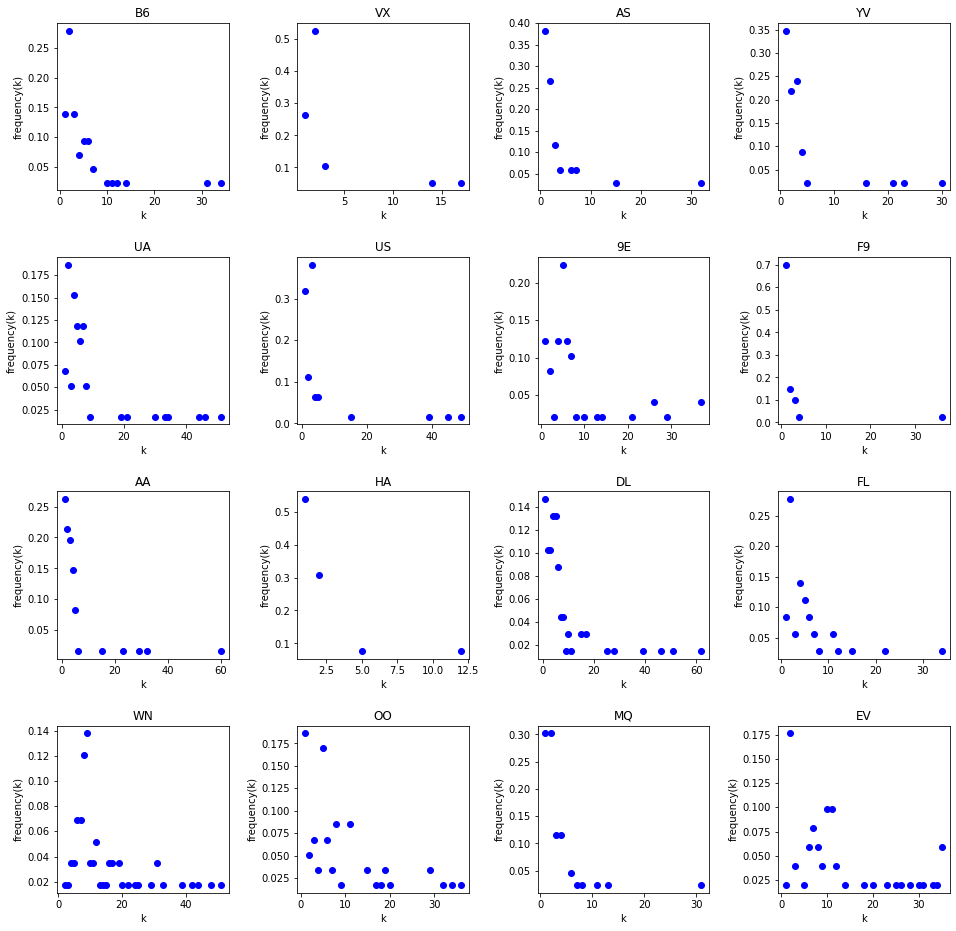

In [0]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
c = 0
for g in networks:
  degree_sequence = sorted([d for n, d in g.degree()]) # degree sequence
  degreeCount = collections.Counter(degree_sequence)
  deg, frq = zip(*degreeCount.items())
  frq = [f/sum(frq) for f in frq]
  ax = fig.add_subplot(4,4,c+1)
  plt.title(carriers[c])
  plt.xlabel("k")
  plt.ylabel("frequency(k)")
  plt.plot(deg, frq, 'bo')
  c += 1

In [0]:
airlines = {
  '9E': 'Endeavor',
  'AA': 'American',
  'AS': 'Alaska',
  'B6': 'JetBlue',
  'DL': 'Delta',
  'EV': 'ExpressJet',
  'F9': 'Frontier',
  'FL': 'AirTran',
  'HA': 'Hawaiian',
  'MQ': 'Envoy',
  'OO': 'SkyWest',
  'UA': 'United',
  'US': 'US Airways',
  'VX': 'Virgin America',
  'WN': 'Southwest',
  'YV': 'Mesa'
}

In [0]:
ba = nx.barabasi_albert_graph(34,2)

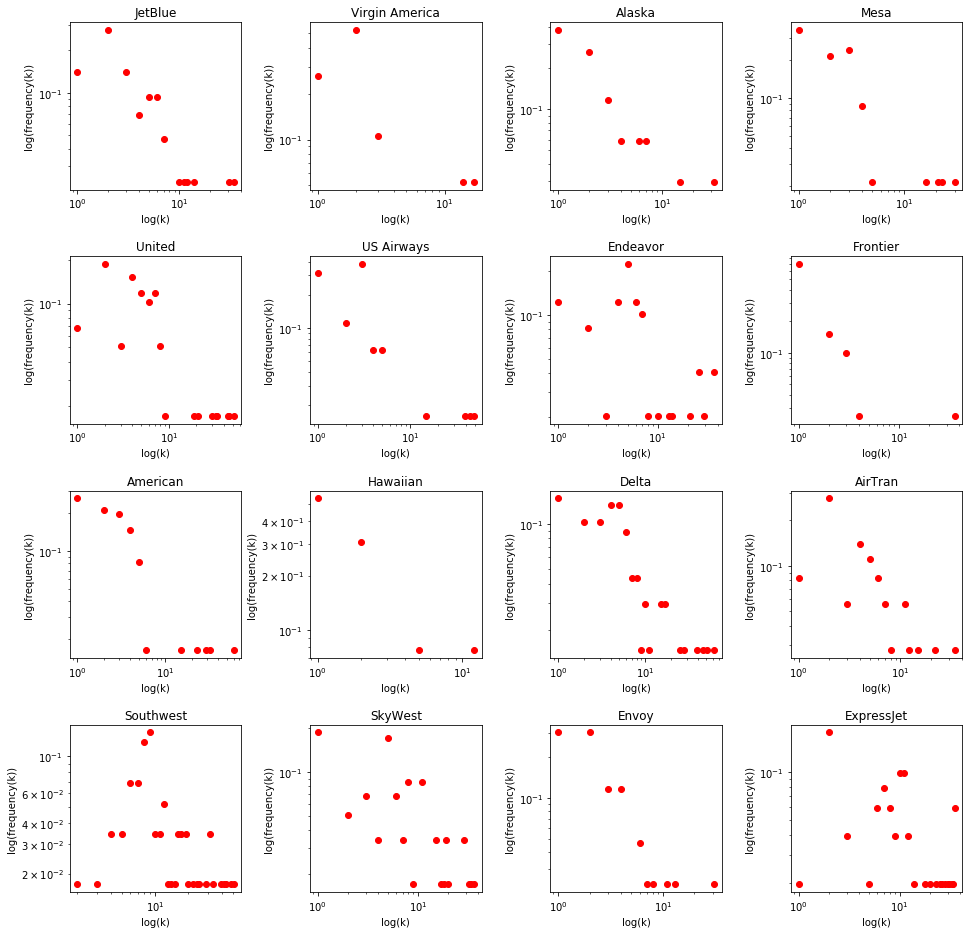

In [0]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(networks)):
  airline = networks[i]
  airline_degree_sequence = sorted([d for n, d in airline.degree()])
  airlineDegreeCount = collections.Counter(airline_degree_sequence)
  airlineDeg, airlineFrq = zip(*airlineDegreeCount.items())
  airlineFrq = [f/sum(airlineFrq) for f in airlineFrq]
  ax = fig.add_subplot(4,4,i+1)
  plt.title(airlines[carriers[i]])
  plt.xlabel("log(k)")
  plt.ylabel("log(frequency(k))")
  plt.loglog(airlineDeg, airlineFrq, 'ro')

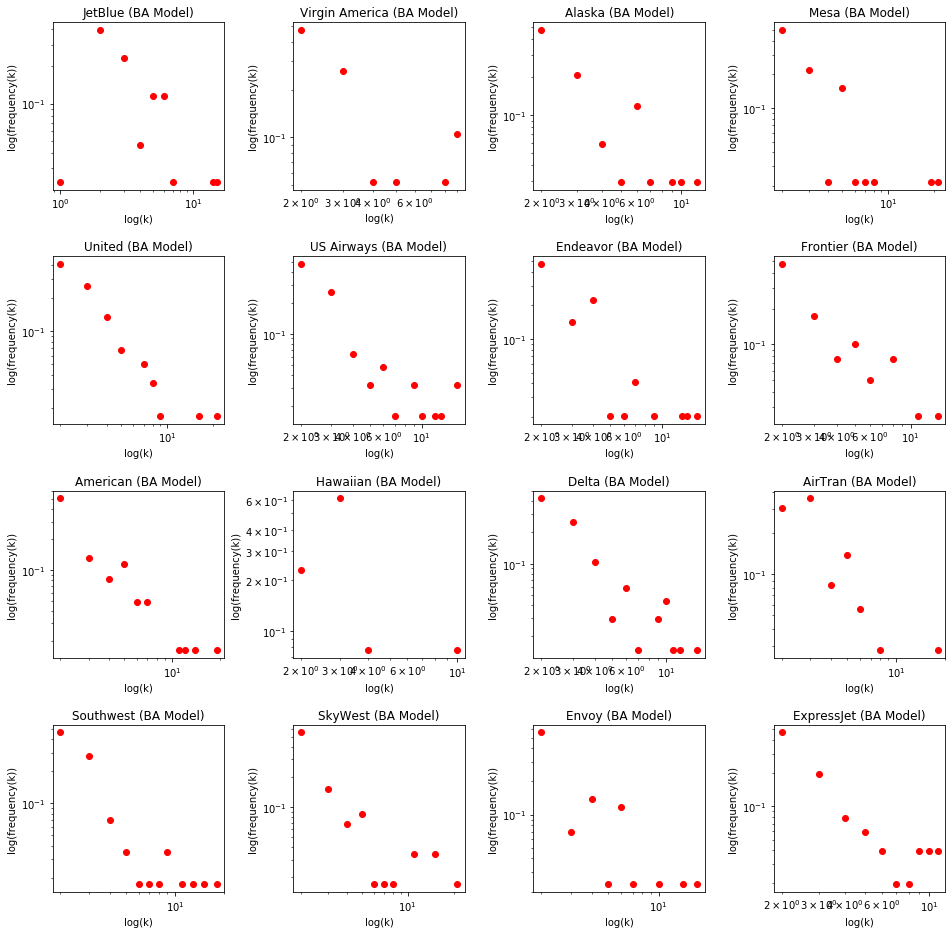

In [0]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(networks)):
  ba = nx.barabasi_albert_graph(len(networks[i].nodes),2)
  ba_degree_sequence = sorted([d for n, d in ba.degree()])
  baDegreeCount = collections.Counter(ba_degree_sequence)
  baDeg, baFrq = zip(*baDegreeCount.items())
  baFrq = [f/sum(baFrq) for f in baFrq]
  ax = fig.add_subplot(4,4,i+1)
  plt.title(airlines[carriers[i]] + " (BA Model)")
  plt.xlabel("log(k)")
  plt.ylabel("log(frequency(k))")
  plt.loglog(baDeg, baFrq, 'ro')

In [0]:
print(nx.average_clustering(alaska), nx.average_clustering(ba))
print(nx.diameter(alaska), nx.diameter(ba))
print(nx.average_shortest_path_length(alaska), nx.average_shortest_path_length(ba))

NameError: ignored

$\bar{c}_{AS} = 0.261$\
$\bar{c}_{BA} = 0.254$

$D_{AS} = 3$\
$D_{BA} = 5$

$\bar{\ell}_{AS} = 1.9$\
$\bar{\ell}_{BA} = 2.4$

In [0]:
networks[5].nodes()

In [0]:
ws = nx.watts_strogatz_graph(58, 6, 0.25)

In [0]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
southwest_degree_sequence = sorted([d for n, d in southwest.degree()])
southwestDegreeCount = collections.Counter(southwest_degree_sequence)
southwestDeg, southwestFrq = zip(*southwestDegreeCount.items())
southwestFrq = [f/sum(southwestFrq) for f in southwestFrq]
ws_degree_sequence = sorted([d for n, d in ws.degree()])
wsDegreeCount = collections.Counter(ws_degree_sequence)
wsDeg, wsFrq = zip(*wsDegreeCount.items())
wsFrq = [f/sum(wsFrq) for f in wsFrq]
ax = fig.add_subplot(2,2,1)
plt.title("Southwest Airlines Degree Distribution")
plt.xlabel("k")
plt.ylabel("frequency(k)")
plt.plot(southwestDeg, southwestFrq, 'bo')
ax = fig.add_subplot(2,2,2)
plt.title("Watts-Strogatz Degree Distribution")
plt.xlabel("k")
plt.ylabel("frequency(k)")
plt.plot(wsDeg, wsFrq, 'bo')
ax = fig.add_subplot(2,2,3)
plt.title("Southwest Airlines Degree Distribution")
plt.xlabel("log(k)")
plt.ylabel("log(frequency(k))")
plt.loglog(southwestDeg, southwestFrq, 'ro')
ax = fig.add_subplot(2,2,4)
plt.title("Watts-Strogatz Degree Distribution")
plt.xlabel("log(k)")
plt.ylabel("log(frequency(k))")
plt.loglog(wsDeg, wsFrq, 'ro')

In [0]:
print(nx.average_clustering(southwest), nx.average_clustering(ws))
print(nx.diameter(southwest), nx.diameter(ws))
print(nx.average_shortest_path_length(southwest), nx.average_shortest_path_length(ws))

In [0]:
nx.draw(net)

In [0]:
importantAirport={}
pt=[]
whole=nx.Graph(wholeGraph)
for i in range(len(networks)):
  x=(nx.betweenness_centrality(networks[i]))
  t=sorted(x.items(), key=operator.itemgetter(1))[-1][0]
  net= nx.Graph(networks[i])
  net.remove_node(t)
  if t in list(whole.nodes()):
    whole.remove_node(t)
  st=carriers[i]+'2.gexf'
  nx.write_gexf(net,st)
  print(str(airlines[carriers[i]]) + ":",len(list(nx.connected_components(net)))/len(list(net.nodes())))

JetBlue: 0.11904761904761904
Virgin America: 0.2777777777777778
Alaska: 0.42424242424242425
Mesa: 0.13333333333333333
United: 0.08620689655172414
US Airways: 0.22580645161290322
Endeavor: 0.041666666666666664
Frontier: 0.7435897435897436
American: 0.2833333333333333
Hawaiian: 0.6666666666666666
Delta: 0.08955223880597014
AirTran: 0.11428571428571428
Southwest: 0.017543859649122806
SkyWest: 0.017241379310344827
Envoy: 0.23809523809523808
ExpressJet: 0.02


In [0]:
st='w.gexf'
nx.write_gexf(wholeGraph,st)

$\bar{c}_{WN} = 0.695$\
$\bar{c}_{WS} = 0.279$

$D_{AS} = 3$\
$D_{BA} = 5$

$\bar{\ell}_{AS} = 1.8$\
$\bar{\ell}_{BA} = 2.6$